## test_d22.ipynb
Test functions contained in d22a.py.

Author: Benjamin S. Grandey, 2023.

In [1]:
import d22a
import datetime
import matplotlib.pyplot as plt

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Watermark, including versions of dependencies
print(d22a.get_watermark())

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

matplotlib : 3.7.1
numpy      : 1.25.0
pandas     : 2.0.3
scipy      : 1.11.1
seaborn    : not installed
statsmodels: 0.14.0
xarray     : 2023.6.0

conda environment: d22a-mcdc

Compiler    : Clang 15.0.7 
OS          : Darwin
Release     : 22.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



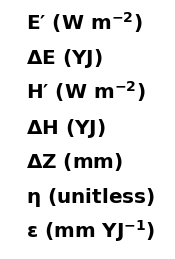

In [4]:
# Test rendering of variable symbols and units
fig, ax = plt.subplots(figsize=(2, 3))
ax.axis('off')
for v, var in enumerate(d22a.SYMBOLS_DICT.keys()):
    var_sym = d22a.SYMBOLS_DICT[var]
    units = d22a.UNITS_DICT[var]
    ax.text(0.1, 0.95-(0.15*v), f'{var_sym} ({units})', fontsize='x-large', fontweight='bold')

In [5]:
%time
# Get calendar, number of days in year, and parent branch year for historical simulation of an ESM
d22a.get_calendar_days_branch(esm='UKESM1-0-LL_r1i1p1f2')

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 1.91 µs


('360_day', 360, 2250)

In [6]:
%time
# Get CMIP6 ESM data, including reading data and basic processing.
d22a.get_cmip6_df()

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
get_cmip6_df(ACCESS-CM2_r1i1p1f1, piControl): shifted start year from 950 to 1850
get_cmip6_df(ACCESS-ESM1-5_r1i1p1f1, piControl): shifted start year from 101 to 1790
get_cmip6_df(CanESM5_r1i1p1f1, piControl): shifted start year from 5201 to 1850
get_cmip6_df(EC-Earth3-Veg-LR_r1i1p1f1, piControl): shifted start year from 2300 to 1850
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): shifted start year from 1850 to 1790
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): gap after 2789; using period before gap; length 1800 yr -> 1000 yr
get_cmip6_df(MIROC6_r1i1p1f1, piControl): shifted start year from 3200 to 1850
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, piControl): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, historical): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1 ssp126): shifted yr-2015 zostoga from 2.0 to 69.4 mm
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, ssp126): appl

,ESM,Scenario,Year,Ep,E,Hp,H,Z,convert_Wm2yr_YJ
0,ACCESS-CM2_r1i1p1f1,piControl,1850,0.376755,-0.026890,0.126548,-0.001323,-1.459961,0.016098
1,ACCESS-CM2_r1i1p1f1,piControl,1851,0.491939,-0.018972,0.019186,-0.001014,-1.108704,0.016098
2,ACCESS-CM2_r1i1p1f1,piControl,1852,0.455935,-0.011632,0.134397,0.001149,-0.109741,0.016098
3,ACCESS-CM2_r1i1p1f1,piControl,1853,0.418888,-0.004889,0.087970,0.002565,0.059875,0.016098
4,ACCESS-CM2_r1i1p1f1,piControl,1854,0.382430,0.001267,0.185772,0.005556,0.322205,0.016098
...,...,...,...,...,...,...,...,...,...
29502,UKESM1-0-LL_r1i1p1f2,ssp585,2096,3.468888,3.291027,3.079318,2.017449,361.353424,0.015866
29503,UKESM1-0-LL_r1i1p1f2,ssp585,2097,3.429853,3.345446,2.697973,2.060256,367.789276,0.015866
29504,UKESM1-0-LL_r1i1p1f2,ssp585,2098,3.208143,3.396347,2.683542,2.102834,373.251892,0.015866
29505,UKESM1-0-LL_r1i1p1f2,ssp585,2099,3.837172,3.457228,3.448655,2.157551,380.574432,0.015866


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


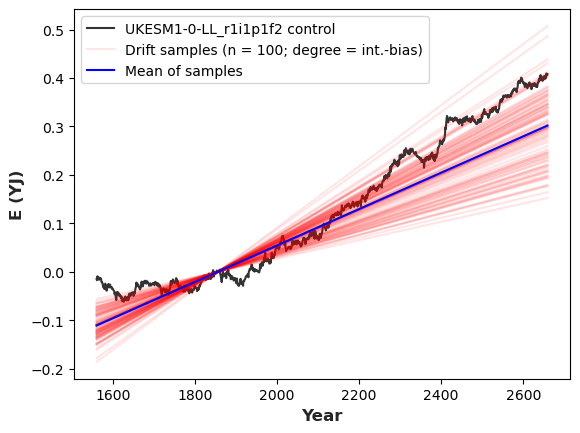

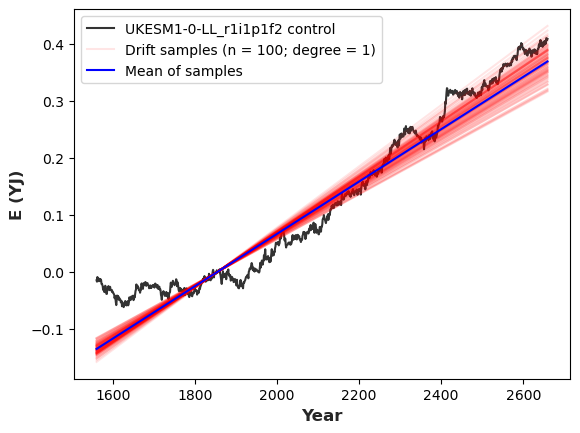

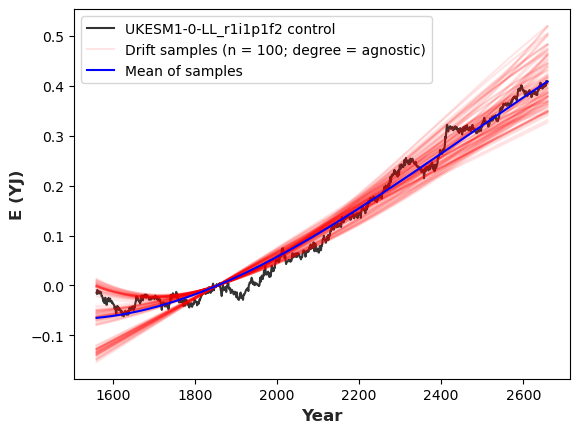

<xarray.DataArray (Draw: 100, Year: 1100)>
array([[-1.33478137e-01, -1.33024901e-01, -1.32571665e-01, ...,
         3.63722259e-01,  3.64175496e-01,  3.64628732e-01],
       [-1.24595352e-01, -1.24172278e-01, -1.23749203e-01, ...,
         3.39517045e-01,  3.39940119e-01,  3.40363194e-01],
       [-1.36739514e-01, -1.36275203e-01, -1.35810893e-01, ...,
         3.72609372e-01,  3.73073683e-01,  3.73537994e-01],
       ...,
       [-2.28873418e-03, -2.61515541e-03, -2.93895734e-03, ...,
         4.44208119e-01,  4.44645405e-01,  4.45081460e-01],
       [-9.40858031e-04, -1.28626770e-03, -1.62891041e-03, ...,
         4.02204440e-01,  4.02479825e-01,  4.02753571e-01],
       [ 1.04355781e-03,  6.87126246e-04,  3.33433948e-04, ...,
         5.03430531e-01,  5.04015145e-01,  5.04598733e-01]])
Coordinates:
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101
  * Year     (Year) int64 1560 1561 1562 1563 1564 ... 2655 2656 2657 2658 2659

In [7]:
%time
# Sample drift of a control simulation, using OLS with HAC. Returns samples as DataArray.
_ = d22a.sample_drift(variable='E', degree='int.-bias', plot=True)
_ = d22a.sample_drift(variable='E', degree=1, plot=True)
drift_da = d22a.sample_drift(variable='E', degree='agnostic', plot=True)
drift_da

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


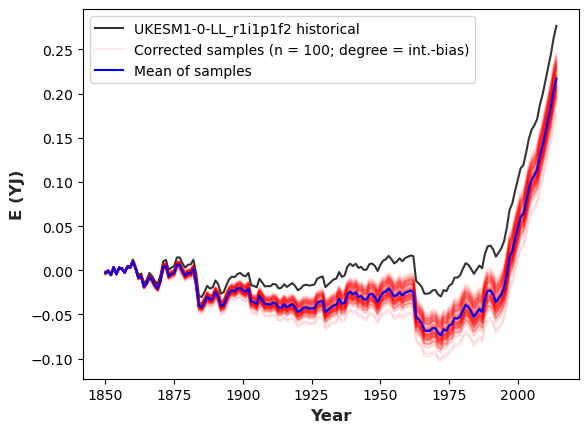

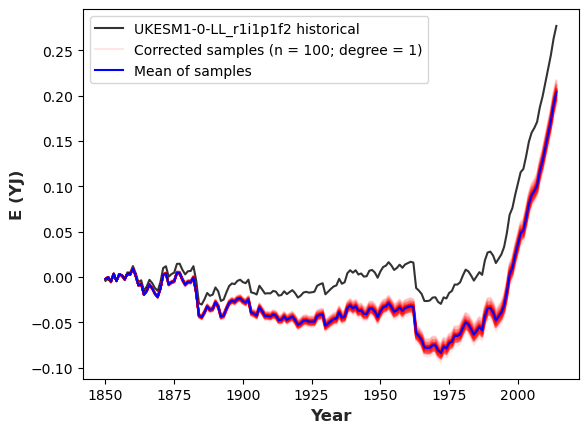

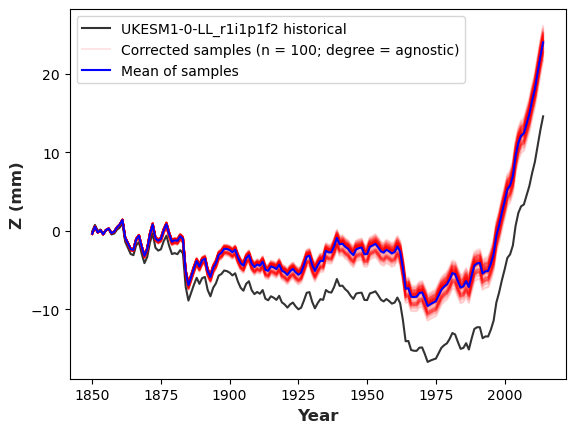

<xarray.DataArray (Year: 165, Draw: 100)>
array([[-0.30443004, -0.31200438, -0.30205619, ..., -0.39522465,
        -0.40091267, -0.39630464],
       [ 0.57214595,  0.56625479,  0.57399227, ...,  0.50200207,
         0.49766682,  0.50112906],
       [-0.16156096, -0.16576893, -0.16024216, ..., -0.21123274,
        -0.21424846, -0.21188642],
       ...,
       [19.02593747, 19.29103945, 18.94285298, ..., 20.27789114,
        20.03904656, 20.48927196],
       [21.10576052, 21.37254569, 21.02214852, ..., 22.35555523,
        22.11232549, 22.56948018],
       [22.91073464, 23.17920299, 22.82659512, ..., 24.15826788,
        23.91061534, 24.3747535 ]])
Coordinates:
  * Year     (Year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101

In [8]:
%time
# Apply MCDC to get drift corrected samples. Returns samples as DataArray.
_ = d22a.sample_corrected(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree='int.-bias', plot=True)
_ = d22a.sample_corrected(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=1, plot=True)
corr_da = d22a.sample_corrected(esm='UKESM1-0-LL_r1i1p1f2', variable='Z', degree='agnostic', plot=True)
corr_da

In [9]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2023-07-10 15:00:27
End:       2023-07-10 15:00:30
Wall time: 3 s
